In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor


In [141]:
df=pd.read_csv("calories.csv")

In [142]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [143]:
df.info

<bound method DataFrame.info of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

In [144]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [145]:
df.drop_duplicates().sum()

User_ID                                            224660378077
Gender        malefemalemalefemalefemalefemalefemalemalemale...
Age                                                      641847
Height                                                2616977.0
Weight                                                1124503.0
Duration                                               232959.0
Heart_Rate                                            1432778.0
Body_Temp                                              600381.8
Calories                                              1343093.0
dtype: object

In [146]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [147]:
df.drop(columns="User_ID",inplace=True)

In [148]:
df.replace("male",0,inplace=True)
df.replace("female",1,inplace=True)

C:\Users\vrooo\AppData\Local\Temp\ipykernel_3916\452068770.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("female",1,inplace=True)


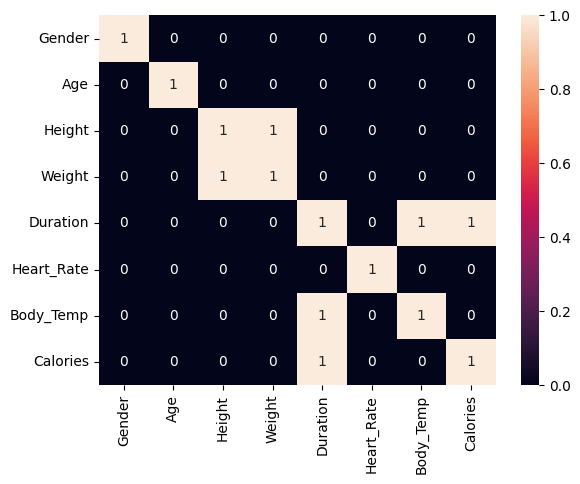

In [149]:
sns.heatmap(df.corr()>0.9,annot=True,cbar=True)
plt.show()

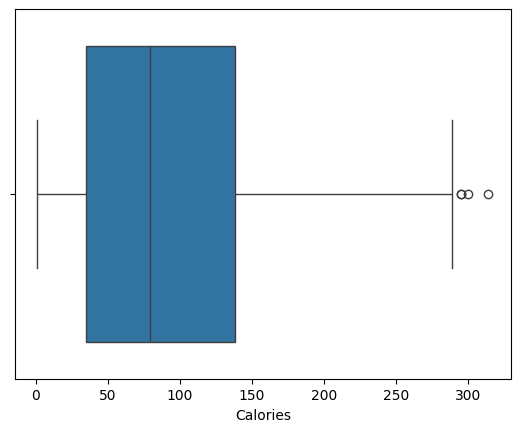

In [150]:
sns.boxplot(x="Calories",data=df)
plt.show()

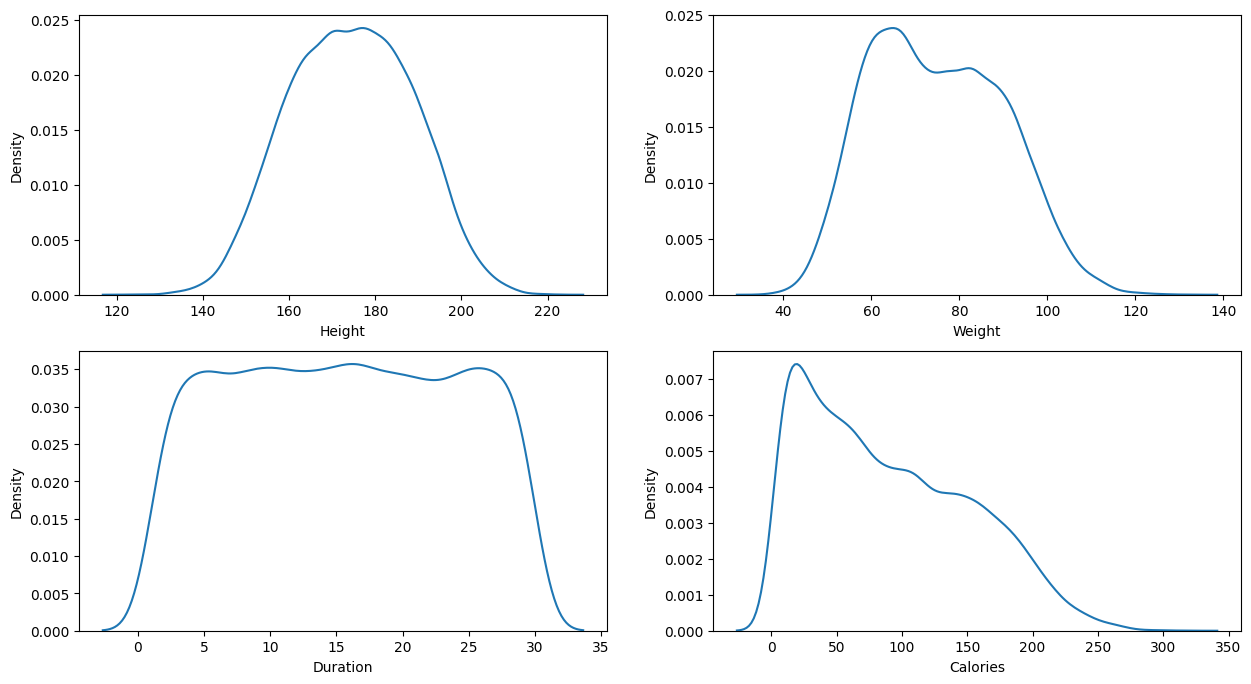

In [151]:
col=["Height","Weight","Duration","Calories"]
plt.figure(figsize=(15,8))
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df[col[i]])
plt.show()

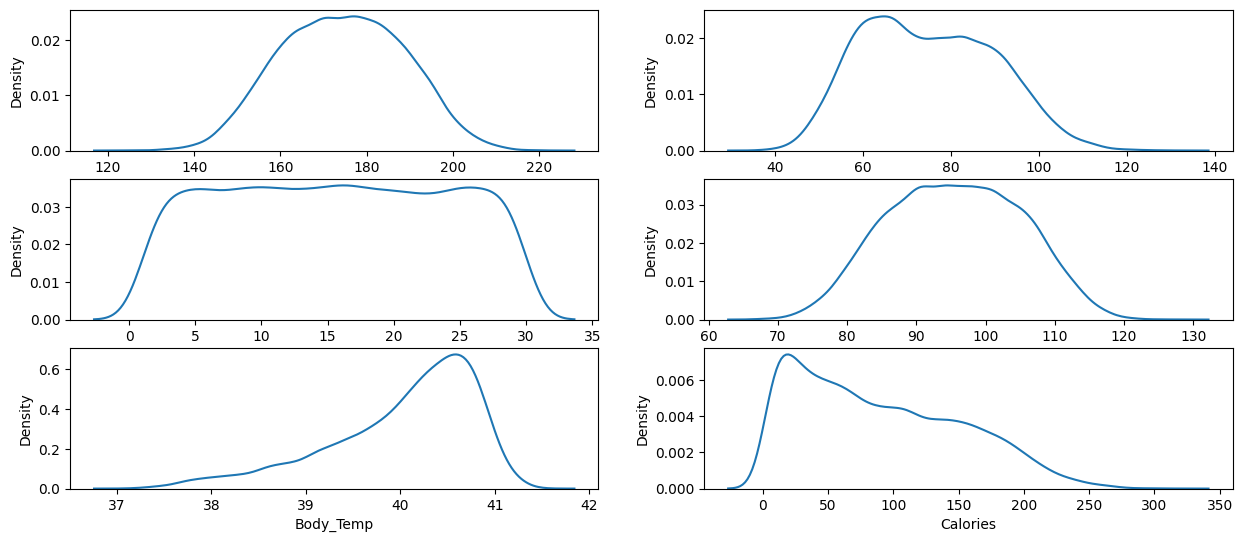

In [152]:
f = df.select_dtypes(include='float').columns
plt.figure(figsize=(15,15))
for i in range(len(f)):
    plt.subplot(7,2,i+1)
    sns.kdeplot(data=df[f[i]])
plt.show()


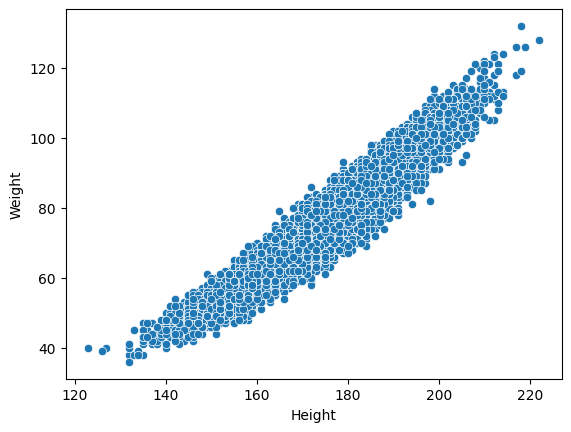

In [153]:
sns.scatterplot(x="Height",y="Weight",data=df)
plt.show()

In [154]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [155]:
x=df.drop(columns="Calories",axis=1)


In [156]:
y=df["Calories"]

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.2)

In [163]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_val=st.transform(x_test)

C:\Users\vrooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [165]:
models = [LinearRegression(),Lasso(), RandomForestRegressor(), Ridge()]

In [178]:
for i in range(4):
    models[i].fit(x_test,y_test)
    models[i].predict(x_test)
    models[i].score(x_test,y_test)*100
print(models[i].predict(x_test))
print(models[i].score(x_test,y_test)*100)


[ 28.20803886 102.29376952   6.98548876 ... 145.51819269   3.3232225
 145.4752349 ]
96.83831343518474


In [180]:

input_data=(0,68,190.0,94.0,29.0,105.0,40.8)
input_data_array=np.asarray(input_data)
input_reshape=input_data_array.reshape(1,-1)
prediction=models[i].predict(input_reshape)
print(f" Calories{prediction}")

 Calories[199.85965662]


C:\Users\vrooo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
